In [10]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csv_files = glob.glob('DOH COVID Data Drop_20240103/DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_*.csv')
dfs = []
date_columns = ['DateSpecimen', 'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover', 'DateRepRem', 'DateOnset']

for filename in csv_files:
    df = pd.read_csv(filename, parse_dates=date_columns)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

C:\Users\Shaun\AppData\Local\Temp\ipykernel_62716\3590213412.py:6: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, parse_dates=date_columns)
C:\Users\Shaun\AppData\Local\Temp\ipykernel_62716\3590213412.py:6: DtypeWarning: Columns (11,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, parse_dates=date_columns)


In [8]:
combined_df.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'DateRepRem', 'Admitted', 'RegionRes', 'ProvRes',
       'CityMunRes', 'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC',
       'HealthStatus', 'Quarantined', 'DateOnset', 'Pregnanttab',
       'ValidationStatus'],
      dtype='object')

c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


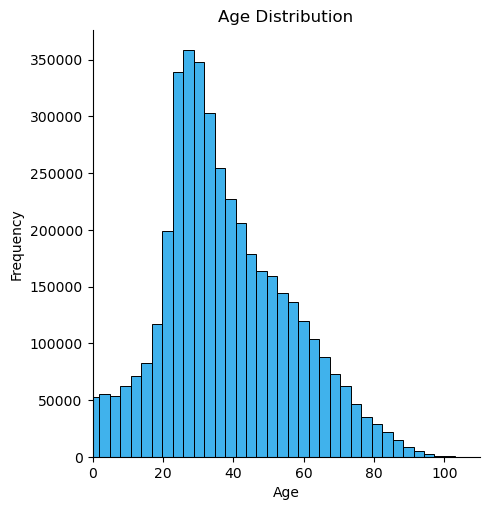

In [20]:
sns.displot(combined_df['Age'], bins=40, kde=False, color='#0099e6')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 110)
plt.show()

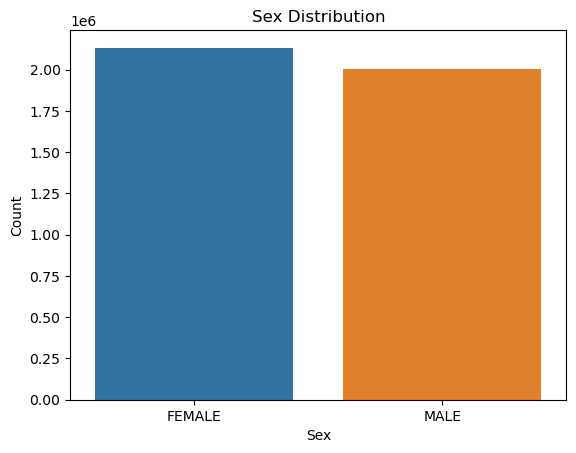

In [21]:
sns.countplot(x='Sex', data=combined_df)

plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

In [35]:
DateRepConfCount = combined_df.groupby('DateRepConf').size().reset_index(name='count')
DateRepConfCount.set_index('DateRepConf', inplace=True)

c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


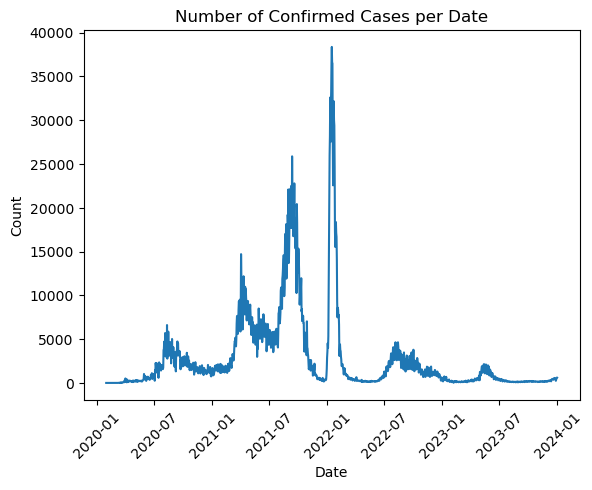

In [40]:
sns.lineplot(x='DateRepConf', y='count', data=DateRepConfCount)

plt.title('Number of Confirmed Cases per Date')
plt.xlabel('Date')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


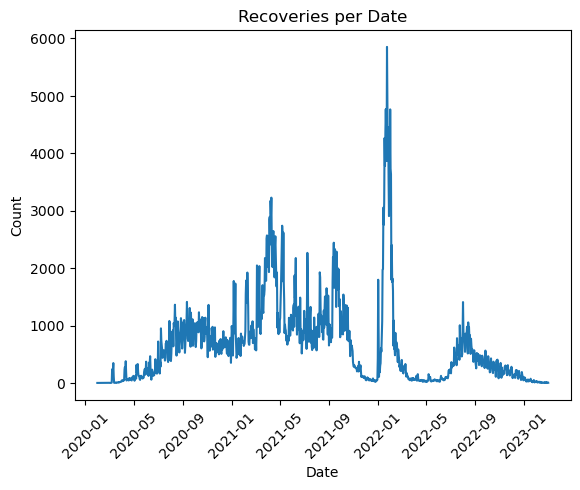

In [41]:
RecoverCount = combined_df.groupby('DateRecover').size().reset_index(name='count')
RecoverCount.set_index('DateRecover', inplace=True)
sns.lineplot(x='DateRecover', y='count', data=RecoverCount)

plt.title('Recoveries per Date')
plt.xlabel('Date')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shaun\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


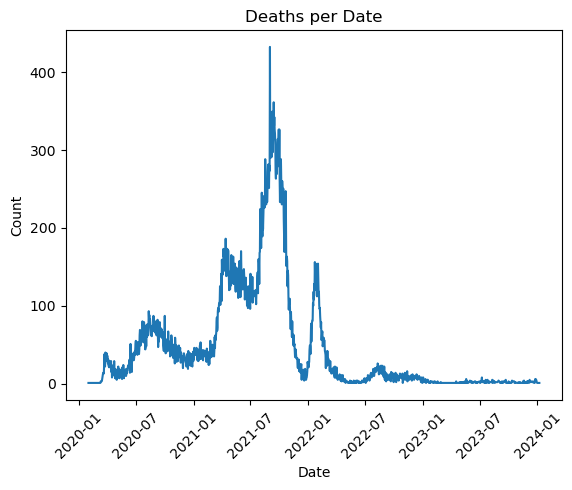

In [42]:
DeathCount = combined_df.groupby('DateDied').size().reset_index(name='count')
DeathCount.set_index('DateDied', inplace=True)
sns.lineplot(x='DateDied', y='count', data=DeathCount)

plt.title('Deaths per Date')
plt.xlabel('Date')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

In [49]:
RecoveryDeathCount = combined_df['RemovalType'].value_counts()

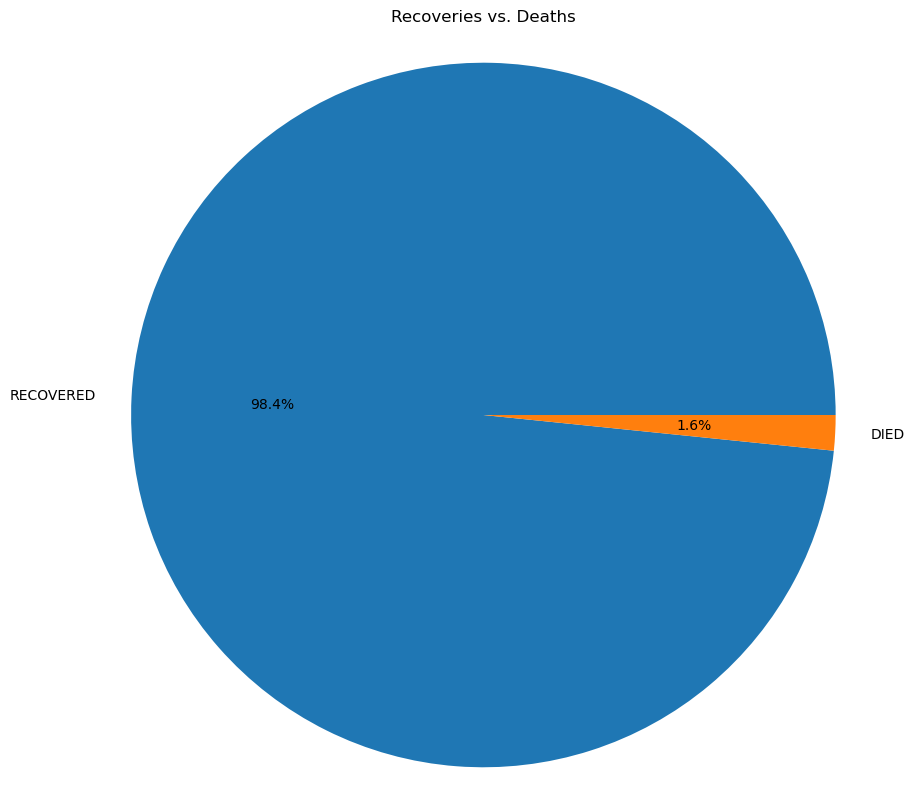

In [51]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.pie(RecoveryDeathCount.values, labels=RecoveryDeathCount.index, autopct='%1.1f%%')
plt.title('Recoveries vs. Deaths')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()